In [2]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

# measurements of single scintillator efficiency to 511 keV gammas using a $^{22}$Na source

## $^{22}$Na and cosmic rate
Measurement apparatus:

* Dark cover made of carton (a must!)
* digitization threshold set to 1 PE vth_t1 = vth_t2 = vth_e = 10
* measured rate with a dedicated script along 1 sec intervals

In [90]:
Edep_threshold = 410 # keV

In [120]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/Geant4Sims/'
primaries = pd.read_csv(main_data_path + 'primaries_gamma511keV_alongXaxis_oneScintillator_threshold_%dkeV.csv'%Edep_threshold)

x_scintillator = 50; # mm
primaries['dx_source_scintillator'] = np.abs(primaries['x_i/mm'] - x_scintillator)
primaries[0:5]

generated = primaries
detected = primaries[primaries.NScintillatorsFired>0]

dx_bins = np.linspace(5,155,16)
hgen,dx_edges = np.histogram(generated.dx_source_scintillator,dx_bins)
hgen_err = np.sqrt(hgen)
hrec,dx_edges = np.histogram(detected.dx_source_scintillator,dx_bins)
hrec_err = np.sqrt(hrec)
heff = np.double(hrec)/np.double(hgen)
heff_err = heff * np.sqrt( 1./np.double(hrec) + 1./np.double(hgen) )
sim_dx = (dx_edges[1:] + dx_edges[:-1])/2


Activity = 0.37e6 # events/sec
# expected rate in Hz, so dT = 1
sim_rate = heff * Activity + cosmic_rate
sim_rate_err = np.sqrt( np.square(heff_err * Activity) + np.square(heff_err * 0.05*Activity) + np.square(cosmic_rate_err) )

## groups with at least 2 hits

In [118]:
# # Na22
# dx       = [10   , 20   , 30   , 40 , 50  , 60  , 70  , 80  , 90  , 100 , 110 , 120 , 130 , 140 , 150] # mm
# rate     = [149.8, 130.4, 106.6,85.0, 70.7, 59.1, 51.3, 42.0, 35.1, 32.6, 27.2, 25.0, 21.4, 21.2, 14.0]
# rate_err = [13.3 , 11.2 , 9.3  ,9.9 , 5.9 , 5.9 , 7.8 , 6.0 , 5.2 , 5.0 , 4.7 , 4.7 , 4.6 , 4.5 , 3.7 ]

# # cosmic
# cosmic_rate     = 3.3
# cosmic_rate_err = 1.3

## groups with at least 1 hit

In [116]:
# Na22
dx       = [10   , 20   , 30   , 40   , 50   , 60   , 70   , 80   , 100 , 120 , 150 ]
rate     = [376.4, 299.8, 253.6, 210.1, 164.9, 144.8, 115.1, 102.0, 73.4, 58.3, 43.9]
rate_err = [19.3 , 20.7 , 18.6 , 13.2 , 10.8 , 9.4  , 9.7  , 12.2 , 6.2 , 9.1 , 5.7 ]

# cosmic
cosmic_rate     = 6.6
cosmic_rate_err = 2.1

# simulation results

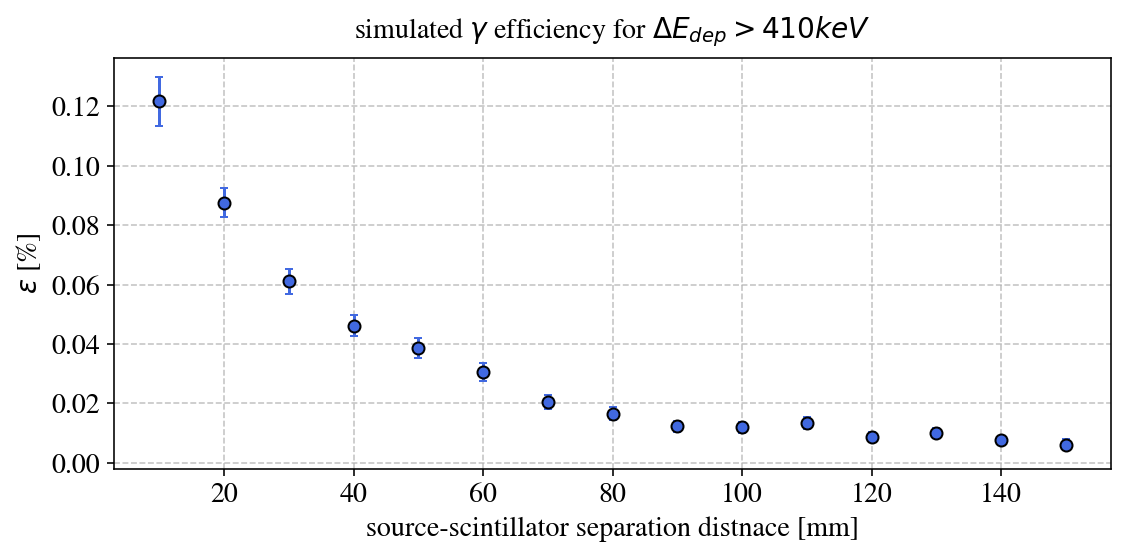

In [132]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)
plt.errorbar(sim_dx,heff*100,heff_err*100,  color='royalblue',           
             marker='o', linestyle='None', capsize=2, markeredgecolor='k')
set_axes(ax,'source-scintillator separation distnace [mm]',y_label='$\\epsilon$ [%]',fontsize=14,
         title='simulated $\\gamma$ efficiency for $\Delta E_{dep}>%d keV$'%Edep_threshold,do_add_grid=True)
plt.tight_layout()

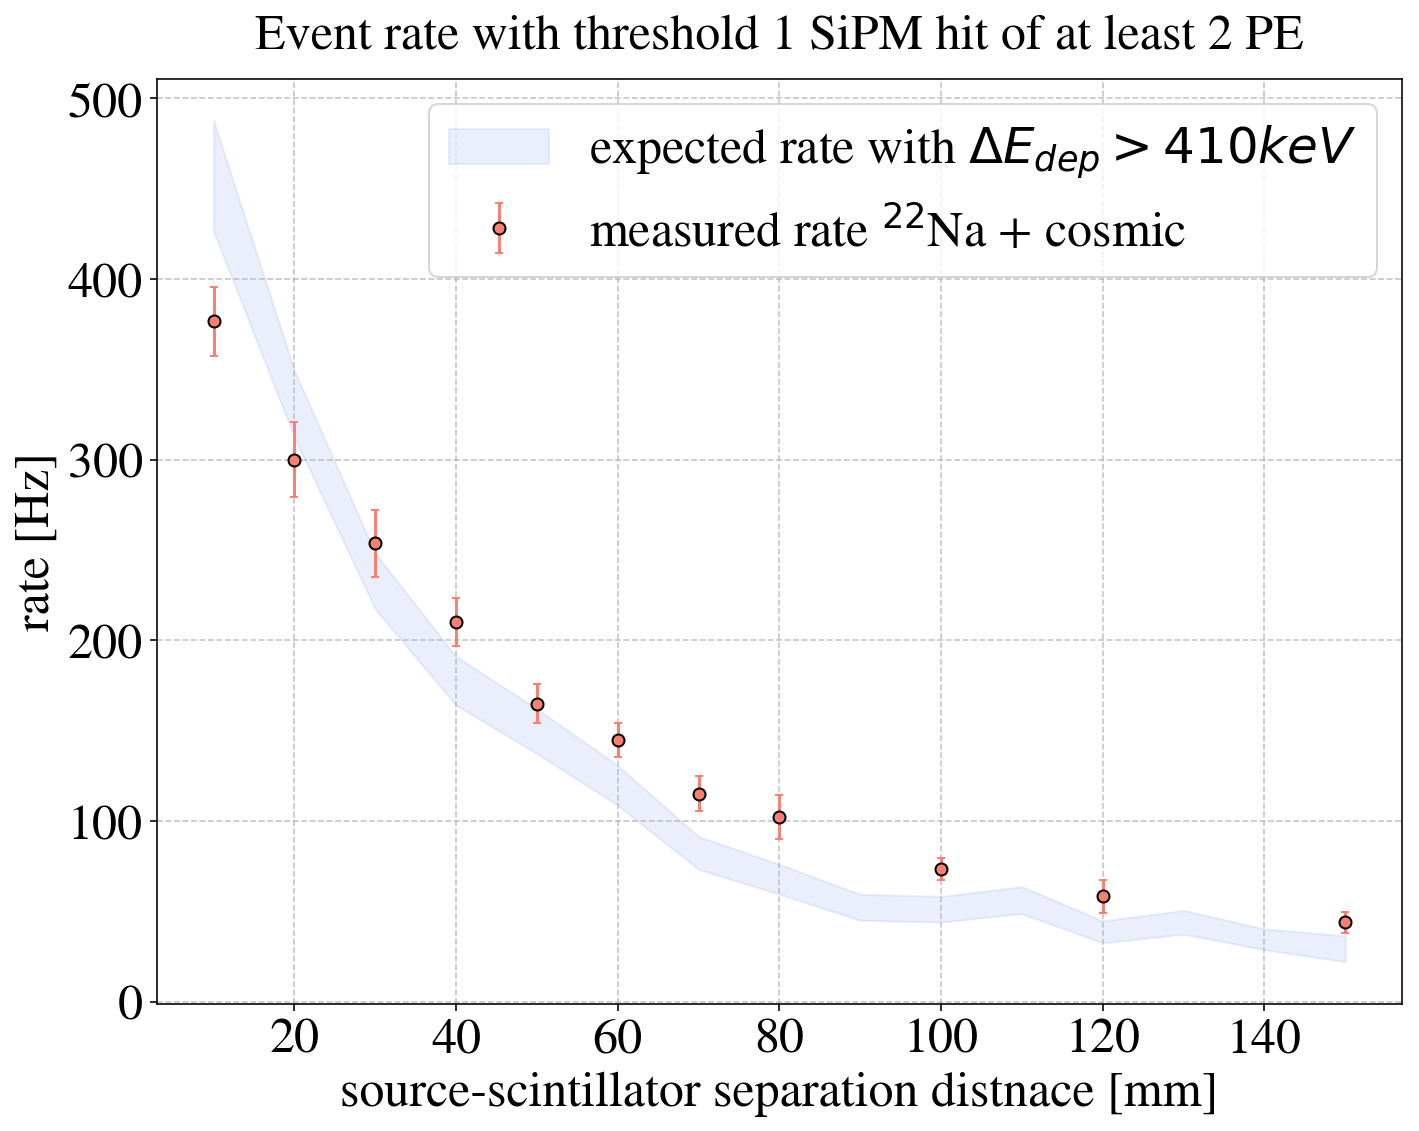

In [128]:
fig=plt.figure(figsize=(10,8))

ax=fig.add_subplot(1,1,1)
plt.fill_between(sim_dx,sim_rate-sim_rate_err,sim_rate+sim_rate_err,color='royalblue',alpha=0.1,
             label='expected rate with $\Delta E_{dep}>%d keV$'%Edep_threshold);
plt.errorbar(dx, rate, rate_err, label='measured rate $^{22}$Na + cosmic',  color='salmon',           
             marker='o', linestyle='None', capsize=2, markeredgecolor='k')
# plt.errorbar(dx, cosmic_rate*np.ones(len(dx)), cosmic_rate_err*np.ones(len(dx)), label='cosmic',             
#              marker='o', linestyle='None', capsize=2, markeredgecolor='k')

set_axes(ax,'source-scintillator separation distnace [mm]',y_label='rate [Hz]',
         title='Event rate with threshold 1 SiPM hit of at least 2 PE',do_add_grid=True,do_add_legend=True)

plt.tight_layout()